# Dandiset 001275 Analysis Notebook
## Mental Navigation in Primate PPC

This notebook explores neurophysiology data from primates performing a mental navigation task, originally published in Neupane et al (2024). The data was collected from two macaques (amadeus and mahler) during a task where they navigated between landmarks using a joystick under varying visibility conditions.

**Note**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please verify all code and results before drawing scientific conclusions.

## Dataset Overview

The dataset contains:
- Behavioral data (joystick movements, trial outcomes)
- Eye and hand position tracking
- Extracellular electrophysiology recordings from parietal cortex

Data is stored in NWB format with separate files for behavior+ecephys and ecephys-only recordings.

In [1]:
# Import required packages
from dandi.dandiapi import DandiAPIClient
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize seaborn for nicer plots
sns.set_theme()

## Accessing Dandiset Metadata

In [2]:
# Connect to DANDI API and list assets
client = DandiAPIClient()
dandiset = client.get_dandiset("001275")
assets = list(dandiset.get_assets())

print(f"Dandiset contains {len(assets)} assets")
print("\nExample assets:")
for asset in assets[:3]:
    print(f"- {asset.path} ({asset.size/1e6:.1f} MB)")

Dandiset contains 20 assets

Example assets:
- sub-mahler/sub-mahler_ses-03122021_behavior+ecephys.nwb (368.4 MB)
- sub-mahler/sub-mahler_ses-03172021_behavior+ecephys.nwb (454.0 MB)
- sub-mahler/sub-mahler_ses-03152021_behavior+ecephys.nwb (553.8 MB)


## Loading an NWB File

We'll analyze a behavior+ecephys session from subject "amadeus":

In [3]:
# Load the NWB file
f = lindi.LindiH5pyFile.from_lindi_file(
    "https://lindi.neurosift.org/dandi/dandisets/001275/assets/b0bbeb4c-5e0d-4050-a993-798173797d94/nwb.lindi.json"
)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

print(f"Session description: {nwb.session_description}")
print(f"Subject: {nwb.subject.subject_id}")
print(f"Start time: {nwb.session_start_time}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: Data from macaque performing mental navigation task. Subject is presented with a start and a target landmark, sampled from a linear map of 6 landmarks on a screen. After a delay, the subject is then cued with a go signal to navigate from start to target landmark with a joystick. Subject should respond by deflecting the joystick in the right direction and holding it until the subject thinks it has arrived at the target landmark. The visual drift or intervening landmarks are all occluded from view making the task a purely mental navigation.
Subject: amadeus
Start time: 2020-01-04 00:00:00-05:00


## Exploring Trial Structure
The experiment involved different trial conditions where landmarks were:
1. Fully visible (linear map)
2. Partially visible (center only)
3. Fully occluded (mental navigation)

Trial counts by condition: {1.0: 334, 3.0: 1551}


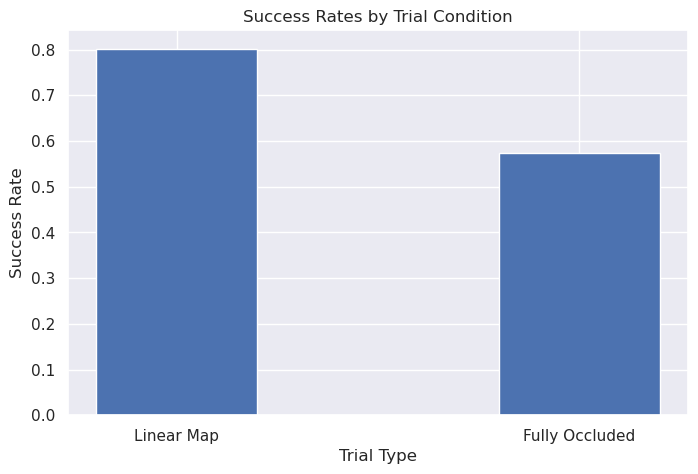

In [4]:
# Get trial data
trials = nwb.intervals["trials"]
trial_types = trials["trial_type"][:]
success = trials["succ"][:]

# Count trials by condition
unique_types, counts = np.unique(trial_types, return_counts=True)
print(f"Trial counts by condition: {dict(zip(unique_types, counts))}")

# Plot success rates
success_rates = [np.mean(success[trial_types == t]) for t in unique_types]

type_labels = {
    1: 'Linear Map',
    2: 'Center Only', 
    3: 'Fully Occluded'
}
current_labels = [type_labels.get(t, f'Type {t}') for t in unique_types]

plt.figure(figsize=(8, 5))
plt.bar(unique_types, success_rates)
plt.xlabel('Trial Type')
plt.ylabel('Success Rate')
plt.title('Success Rates by Trial Condition')
plt.xticks(unique_types, current_labels)
plt.show()

## Neural Activity
The dataset contains extracellular recordings from parietal cortex. Let's examine spike times from example units.

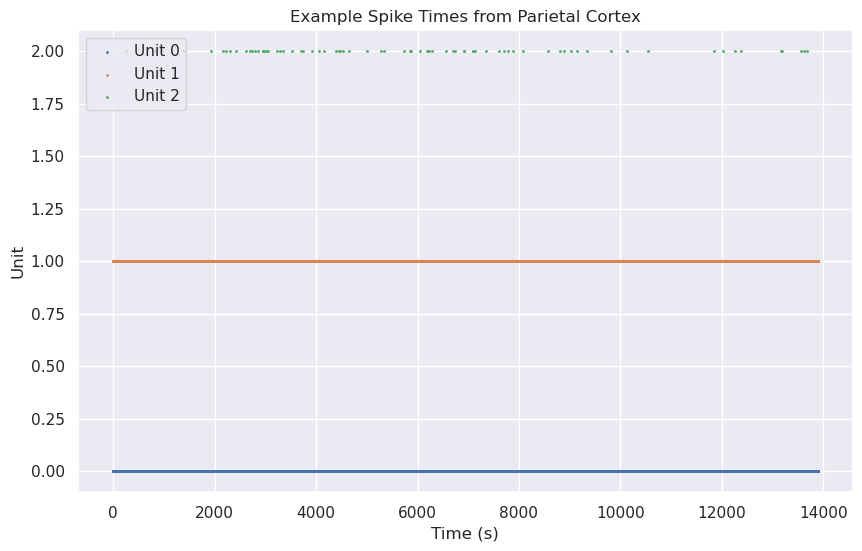

In [5]:
# Get units data
units = nwb.processing["ecephys"]["units"]
unit_ids = units["id"].data[:3]  # First 3 units

# Plot spike times
plt.figure(figsize=(10, 6))
for i, unit_id in enumerate(unit_ids):
    spike_times = units["spike_times"][i]
    plt.scatter(spike_times, [i] * len(spike_times), s=1, label=f'Unit {unit_id}')
plt.xlabel('Time (s)')
plt.ylabel('Unit')
plt.title('Example Spike Times from Parietal Cortex')
plt.legend()
plt.show()

## Behavioral Performance
Response times provide insight into task difficulty:

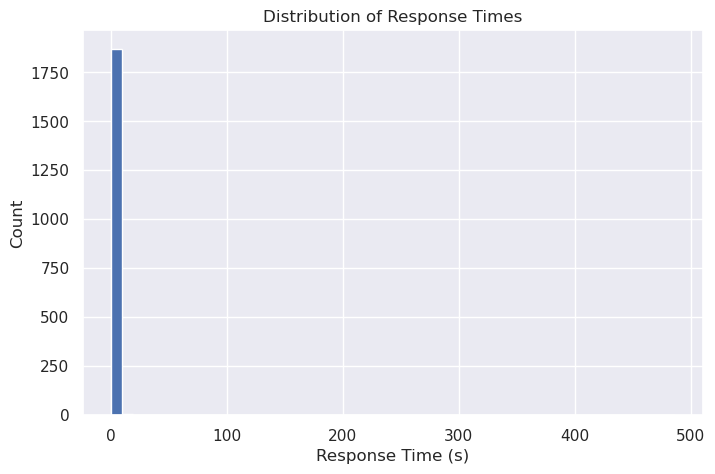

In [6]:
# Plot response time distribution
rt = trials["rt"][:]
plt.figure(figsize=(8, 5))
plt.hist(rt, bins=50)
plt.xlabel('Response Time (s)')
plt.ylabel('Count')
plt.title('Distribution of Response Times')
plt.show()

## Summary

This notebook demonstrates how to:
- Load and explore Dandiset 001275 NWB files
- Access behavioral and neural data
- Perform basic visualizations of task performance and neural activity

To continue analysis, you might:
- Compare neural activity across trial conditions
- Examine eye/hand position trajectories
- Calculate neuronal tuning properties

Remember: This is an introductory notebook - more sophisticated analyses would require careful statistical testing.